## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

## Data Analysis 

In [2]:
diabetes_df = pd.read_csv("Datasets/Uncleaned_Diabetes.csv")
print(diabetes_df.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [3]:
print(diabetes_df.info())
print(diabetes_df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253688 entries, 0 to 253687
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253687 non-null  float64
 1   HighBP                253686 non-null  object 
 2   HighChol              253685 non-null  object 
 3   CholCheck             253686 non-null  object 
 4   BMI                   253686 non-null  float64
 5   Smoker                253685 non-null  object 
 6   Stroke                253686 non-null  object 
 7   HeartDiseaseorAttack  253686 non-null  object 
 8   PhysActivity          253687 non-null  object 
 9   Fruits                253684 non-null  object 
 10  Veggies               253687 non-null  object 
 11  HvyAlcoholConsump     253686 non-null  object 
 12  AnyHealthcare         253685 non-null  object 
 13  NoDocbcCost           253686 non-null  object 
 14  GenHlth               253686 non-null  float64
 15  

In [4]:
# check for NULL values
print(diabetes_df.isnull().sum())

Diabetes_binary         1
HighBP                  2
HighChol                3
CholCheck               2
BMI                     2
Smoker                  3
Stroke                  2
HeartDiseaseorAttack    2
PhysActivity            1
Fruits                  4
Veggies                 1
HvyAlcoholConsump       2
AnyHealthcare           3
NoDocbcCost             2
GenHlth                 2
MentHlth                1
PhysHlth                1
DiffWalk                3
Sex                     1
Age                     1
Education               1
Income                  1
dtype: int64


In [5]:
print(diabetes_df.shape)
diabetes_df.dtypes

(253688, 22)


Diabetes_binary         float64
HighBP                   object
HighChol                 object
CholCheck                object
BMI                     float64
Smoker                   object
Stroke                   object
HeartDiseaseorAttack     object
PhysActivity             object
Fruits                   object
Veggies                  object
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost              object
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                 object
Sex                      object
Age                     float64
Education               float64
Income                  float64
dtype: object

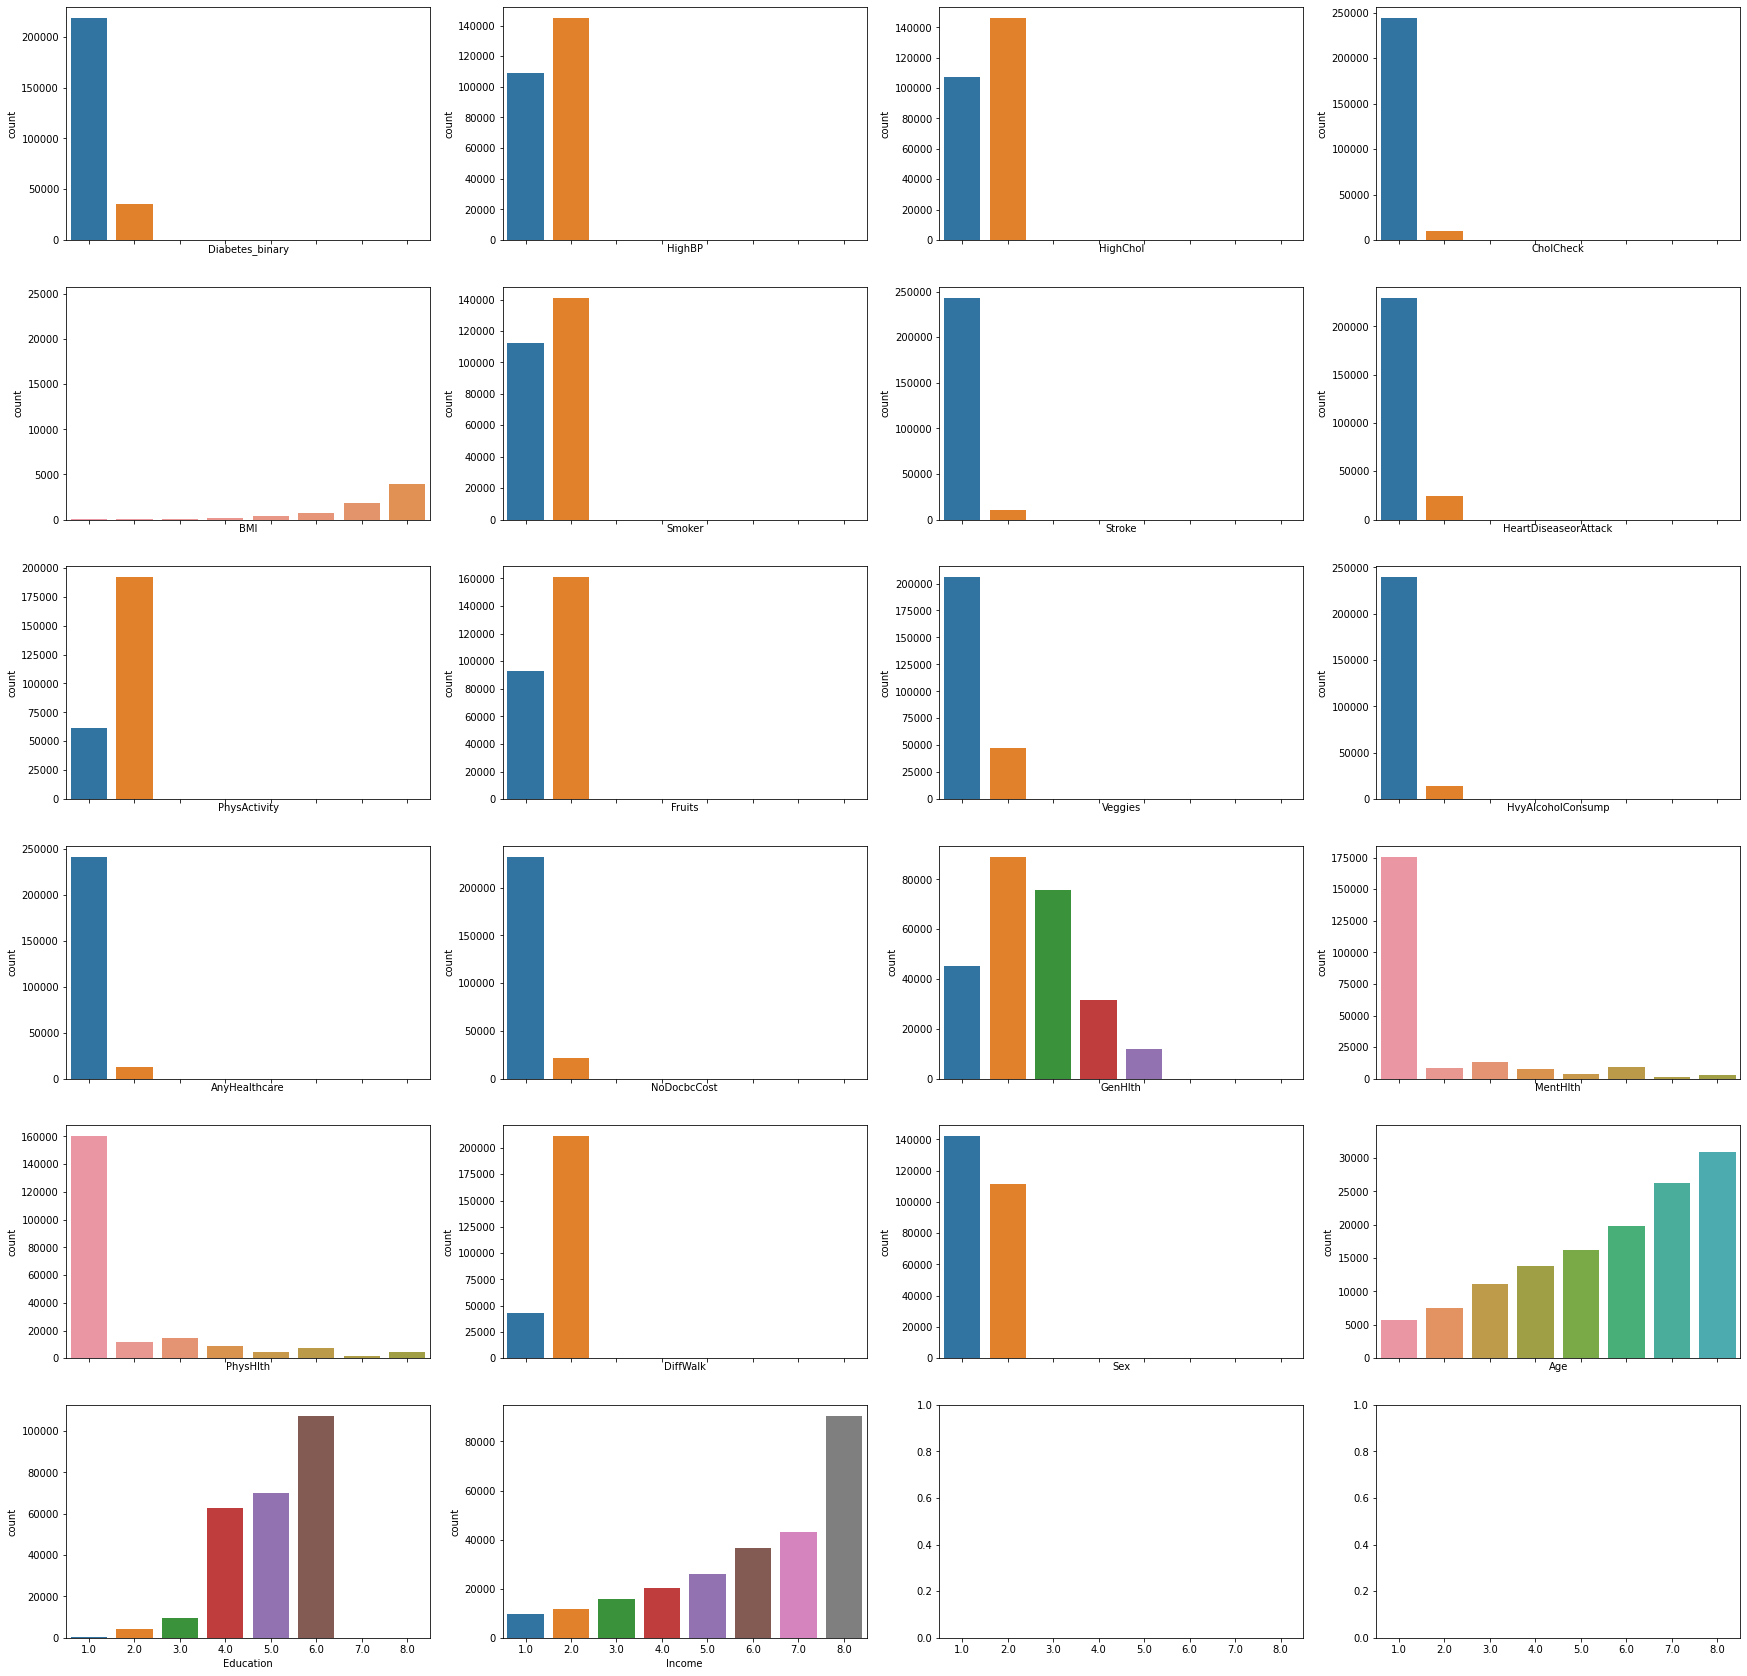

In [6]:
figure, axes = plt.subplots(6, 4, sharex=True, figsize=(30,30))

count = 0
count2 = 0

for col in diabetes_df.columns:
    sb.countplot(x = col, data = diabetes_df, ax=axes[count, count2])
    count2+=1
    if(count2==4):
        count+=1
        count2 = 0

Taking a closer look at the Diabetes column:

Text(0.5, 1.0, 'Diabetes statuses of 253688 Observations')

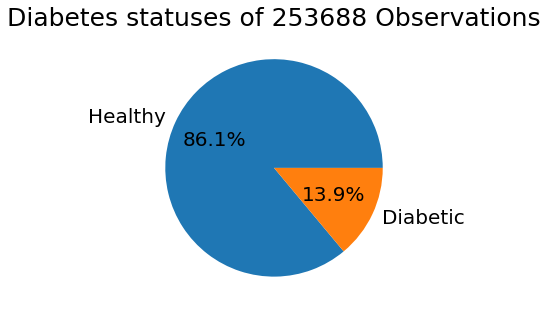

In [7]:
diabetes_df['Diabetes_binary'] = diabetes_df['Diabetes_binary'].replace({0.0:'Healthy', 1.0:'Diabetic'})

axes = diabetes_df['Diabetes_binary'].value_counts().plot.pie(autopct='%1.1f%%', fontsize=20, figsize=(5, 5))

axes.set_title("Diabetes statuses of {} Observations".format(diabetes_df.shape[0]), fontsize=25)

As we can see from the Bar graph, the Class is heavily skewed towards '0' where most participants have no diabetes. This can cause a large number of false negatives in our prediction. In order to deal with this, we decided to balance both the classes.

## Data Cleaning

Balancing the data of Diabetic and non-diabetic

In [8]:
print(diabetes_df["Diabetes_binary"].value_counts())

Healthy     218340
Diabetic     35347
Name: Diabetes_binary, dtype: int64


In [9]:
def reclassify_data():
    value = 35346 #number of '0's
    first = 1

    with open('Datasets/Cleaned_Diabetes.csv', "w+") as file1:
        with open("Datasets/Uncleaned_Diabetes.csv", "r") as file:
            for line in file:
                if first == 1:
                    file1.writelines(line)
                    first = 0
                    continue

                
                currentLine = line.split(',')
                
                stop = 0
                
                #REMOVE DUPLICATES
                for i in range(17):
                    if (currentLine[i] == ""):
                        stop = 1
                        break
                
                if(stop):
                    continue

                for i in range(1, 3):
                    if currentLine[i] == "Hi":
                        currentLine[i] = "1.0"
                    else:
                        currentLine[i] = "0.0"
            
                for i in range(5, 14):
                    if currentLine[i] == "Yes":
                        currentLine[i] = "1.0"
                    else:
                        currentLine[i] = "0.0"

                for i in [3, 17]:
                    if currentLine[i] == "Yes":
                        currentLine[i] = "1.0"
                    else:
                        currentLine[i] = "0.0"

                if currentLine[18] == "Male":
                    currentLine[18] = "1.0"
                else:
                    currentLine[18] = "0.0"

                if float(currentLine[15]) > 0:
                    currentLine[15] = "1.0"
                if float(currentLine[16]) > 0:
                    currentLine[16] = "1.0"
                
                file1.writelines(",".join(currentLine))

In [10]:
reclassify_data()
cleanDiabetes_df = pd.read_csv("Datasets/Cleaned_Diabetes.csv") 

### Cholesterol Check

We notice that some people who indicates high cholesterol but replied no for having their cholesterol checked shows that the data is unreliable and inconsistent, hence we decide to remove such cases.

In [11]:
cleanDiabetes_df = cleanDiabetes_df[~((cleanDiabetes_df['CholCheck'] == 0.0) & (cleanDiabetes_df['HighChol'] != 0.0))]


## Data Resampling

In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X = cleanDiabetes_df.iloc[:, 1:]
y = cleanDiabetes_df.Diabetes_binary

X_rus, y_rus = rus.fit_resample(X, y)

cleanDiabetes_df = pd.concat([y_rus, X_rus], axis=1)
cleanDiabetes_df["Diabetes_binary"].value_counts()

cleanDiabetes_df.to_csv('Datasets/Cleaned_Diabetes.csv')

In [13]:
cleanDiabetes_df["Diabetes_binary"].value_counts()

0    35211
1    35211
Name: Diabetes_binary, dtype: int64

## Dataset after Data clean up

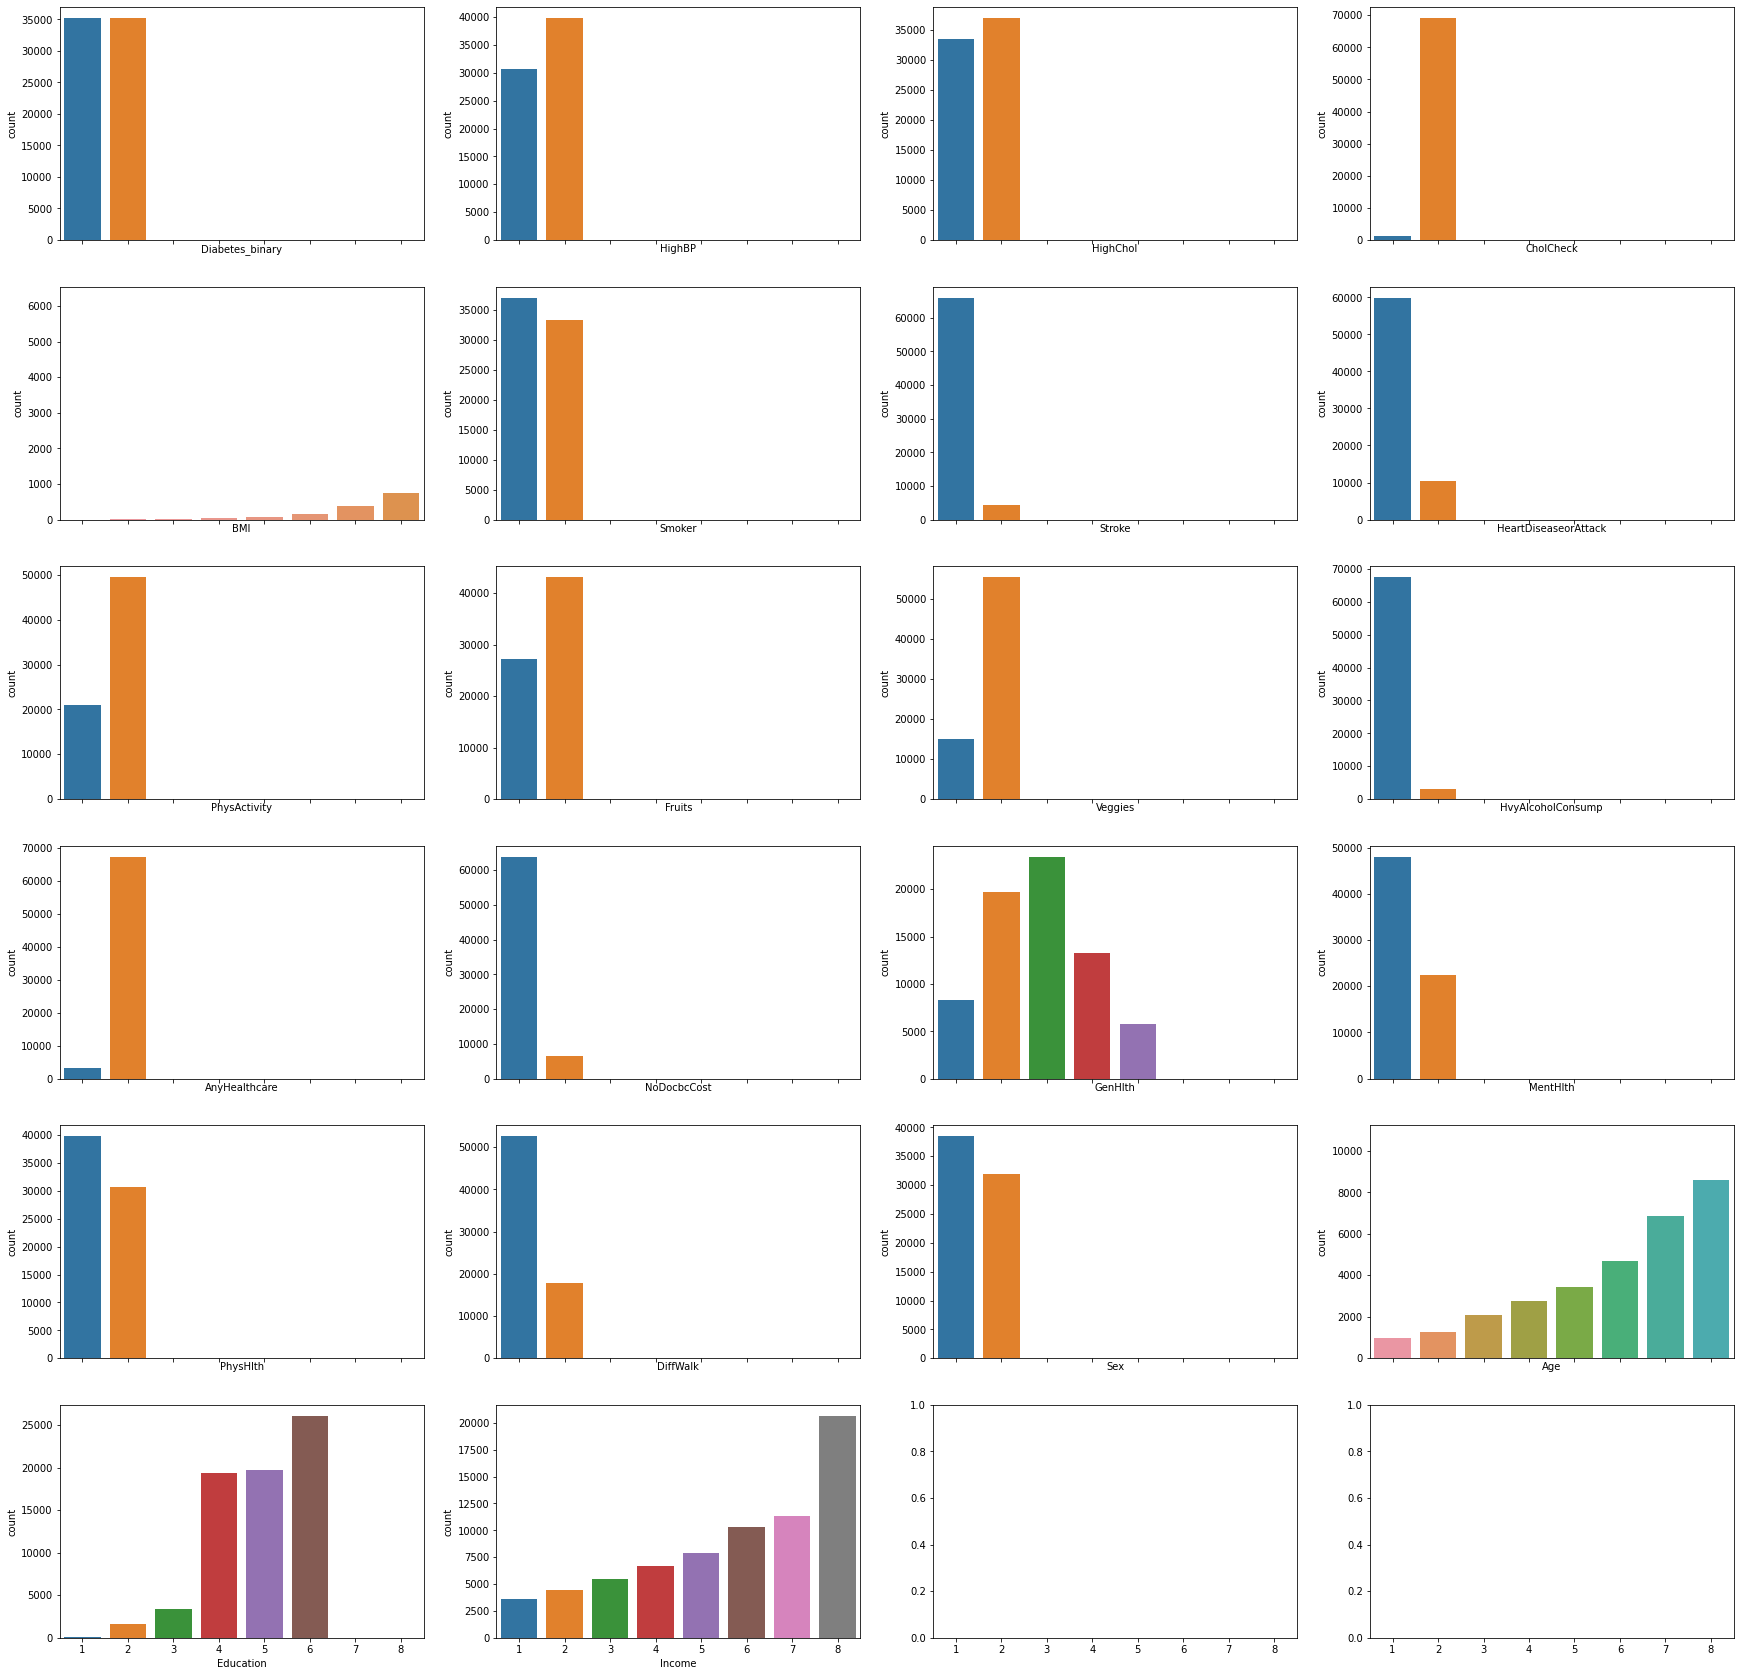

In [14]:
figure, axes = plt.subplots(6, 4, sharex=True, figsize=(30,30))

count = 0
count2 = 0

for col in cleanDiabetes_df.columns:
    sb.countplot(x = col, data = cleanDiabetes_df, ax=axes[count, count2])
    count2+=1
    if(count2==4):
        count+=1
        count2 = 0

We can now see that the data is balanced, with data like mental health, physical health categorized into 1s and 0s

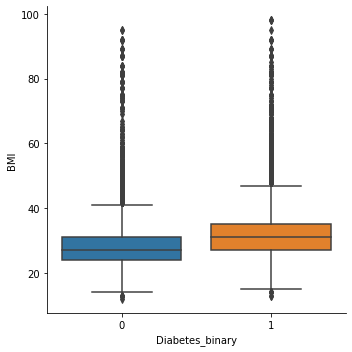

In [15]:
sb.catplot(y="BMI", x="Diabetes_binary", kind="box", data=cleanDiabetes_df)

In [16]:
bmi = cleanDiabetes_df["BMI"]
q1_bmi = bmi.quantile(0.25) 
q3_bmi = bmi.quantile(0.75) 
iqr_bmi = q3_bmi-q1_bmi

print("(Before) Data dims : ", cleanDiabetes_df.shape)
diabetes_filtered = cleanDiabetes_df[(cleanDiabetes_df["BMI"] < (q3_bmi + (1.5 * iqr_bmi))) & (cleanDiabetes_df["BMI"] > (q1_bmi - (1.5 * iqr_bmi)))] 
print("Data dims : ", diabetes_filtered.shape)

(Before) Data dims :  (70422, 22)
Data dims :  (67855, 22)


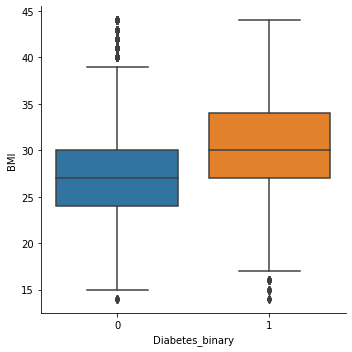

In [17]:
sb.catplot(y="BMI", x="Diabetes_binary", kind="box", data=diabetes_filtered)

<AxesSubplot:>

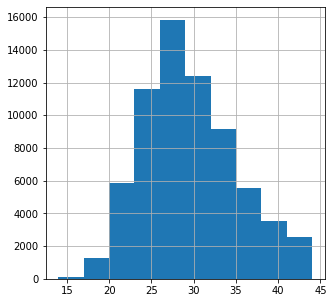

In [18]:
diabetes_filtered.BMI.hist(figsize = (5,5))

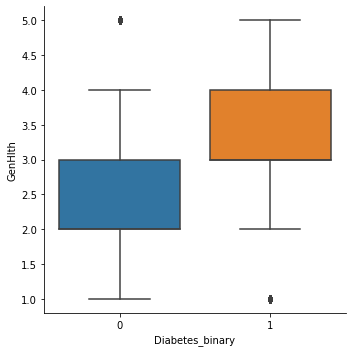

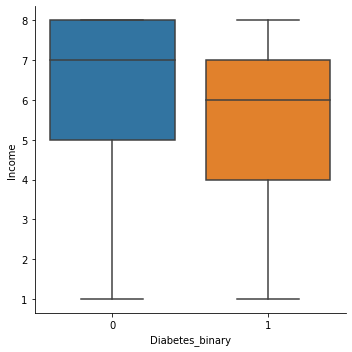

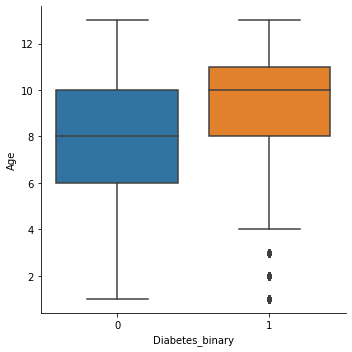

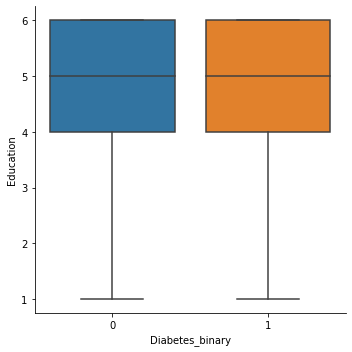

In [19]:
sb.catplot(y="GenHlth", x="Diabetes_binary", kind="box", data=diabetes_filtered)
sb.catplot(y="Income", x="Diabetes_binary", kind="box", data=diabetes_filtered)
sb.catplot(y="Age", x="Diabetes_binary", kind="box", data=diabetes_filtered)
sb.catplot(y="Education", x="Diabetes_binary", kind="box", data=diabetes_filtered)